In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\archive (27)\Ecommerce Customers.csv")

In [59]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [63]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [65]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [67]:
df.duplicated().sum()

0

In [69]:
df = df.drop(["Email","Address", "Avatar"], axis = 1)

<Axes: >

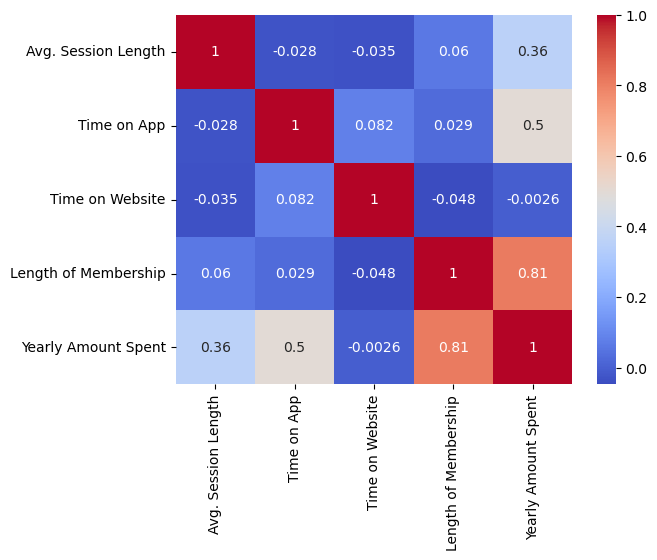

In [71]:
sns.heatmap(data = df.corr(), cmap = "coolwarm", annot = True)

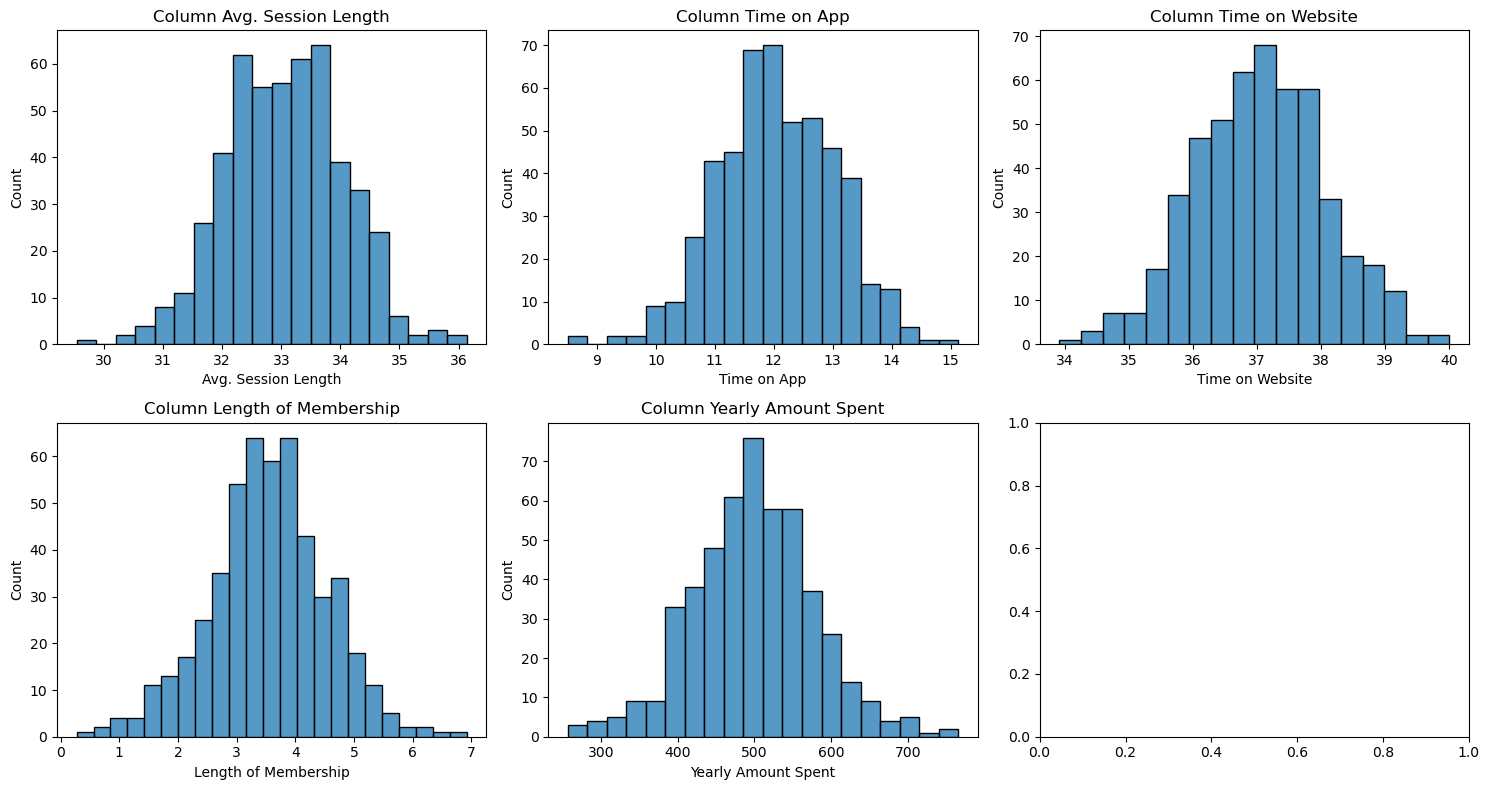

In [72]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.histplot(data = df, x = column, ax= axes[i])
    axes[i].set_title(f"Column {column}")
plt.tight_layout()

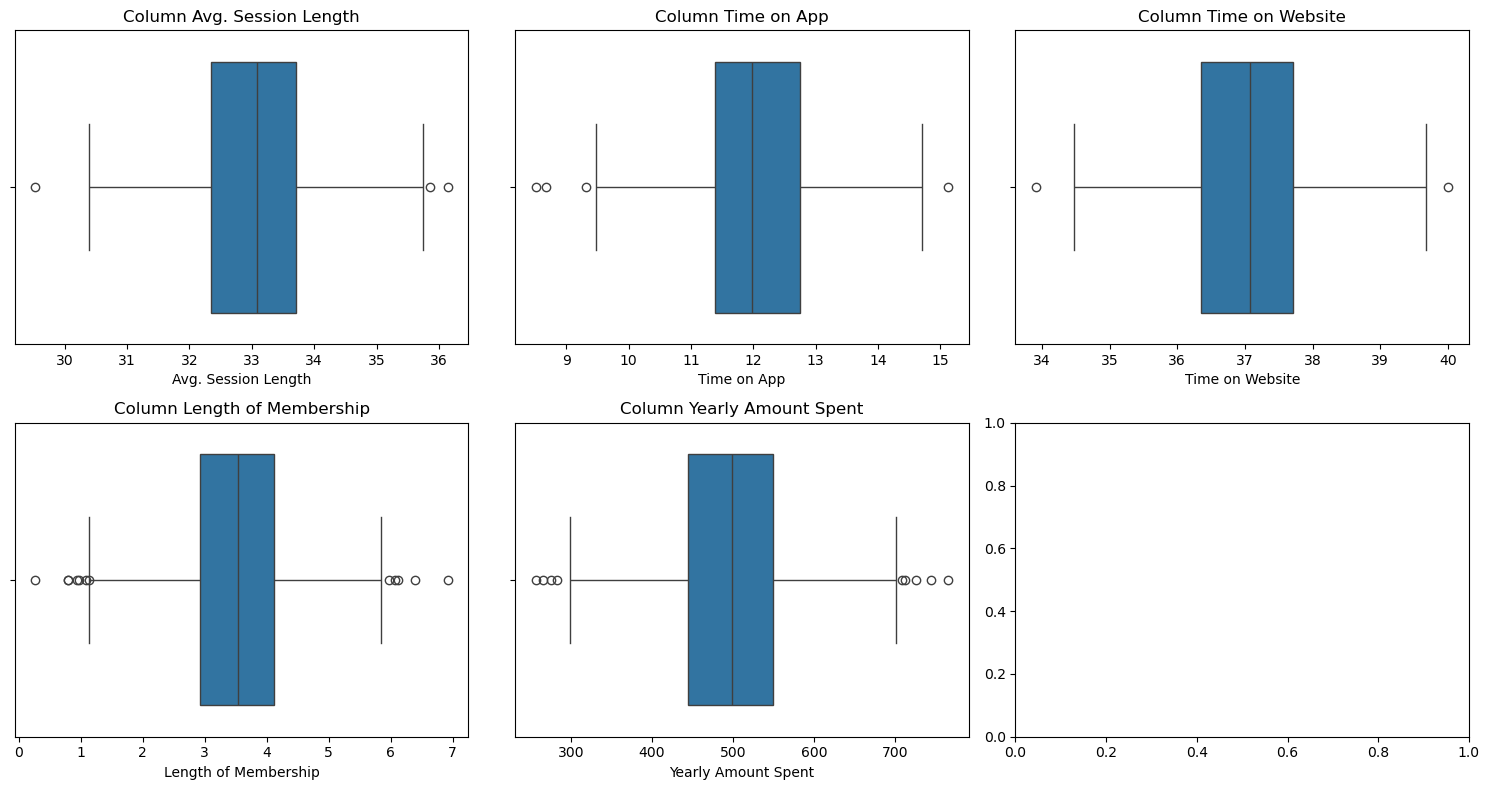

In [73]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.boxplot(data = df, x = column, ax= axes[i])
    axes[i].set_title(f"Column {column}")
plt.tight_layout()

In [74]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

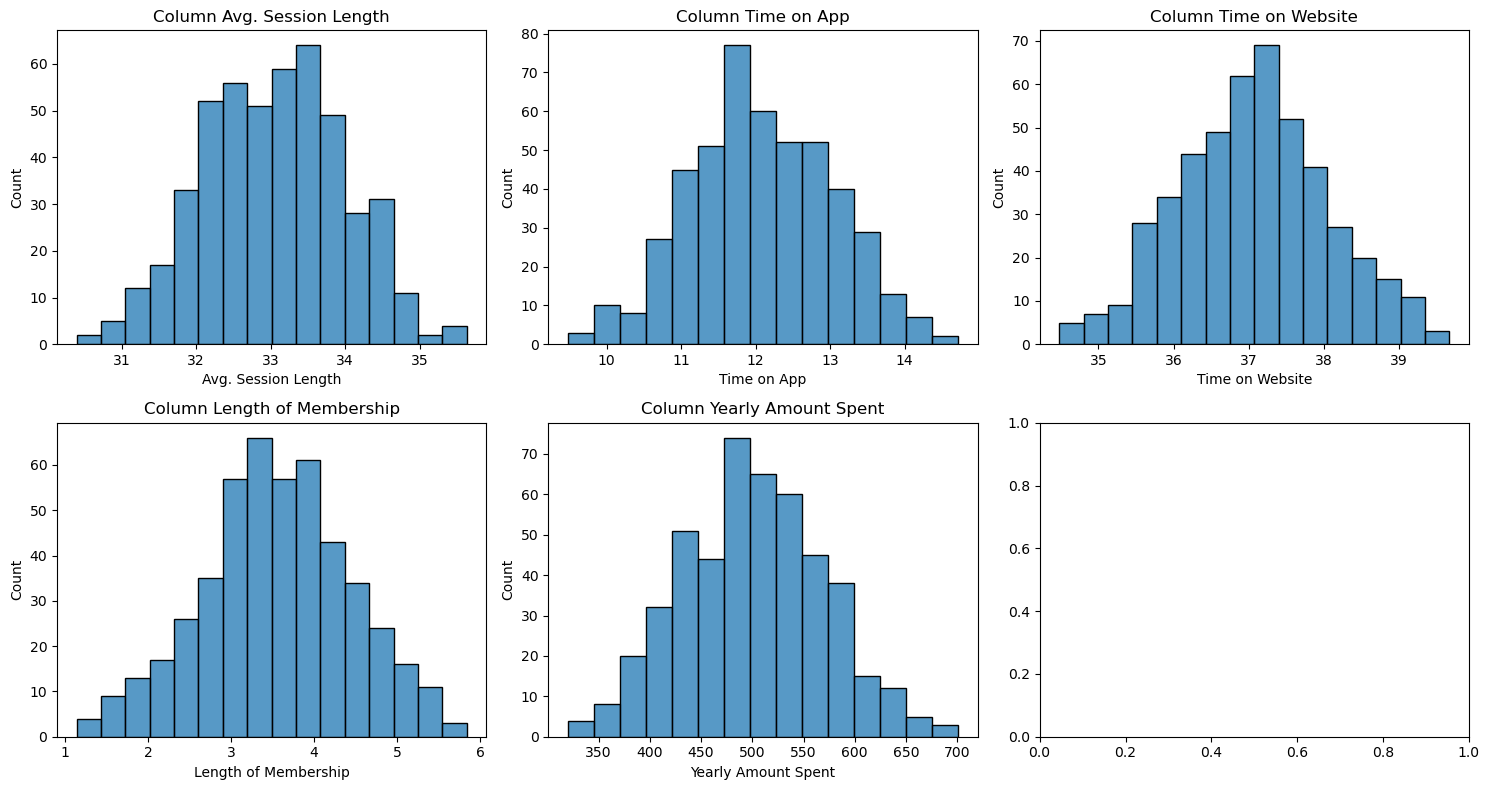

In [75]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, column in enumerate(df_clean.columns):
    sns.histplot(data = df_clean, x = column, ax= axes[i])
    axes[i].set_title(f"Column {column}")
plt.tight_layout()

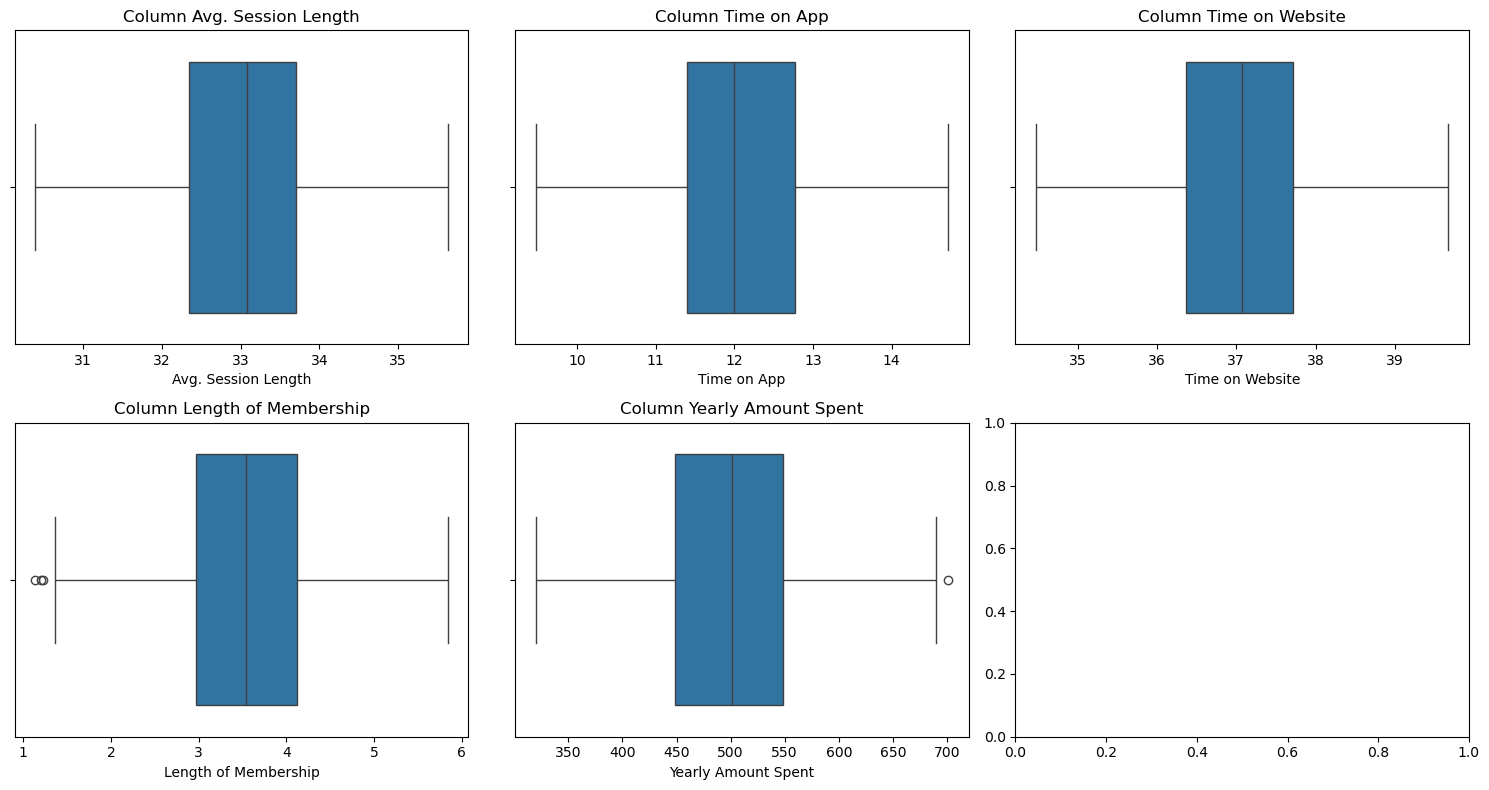

In [77]:
fig, axes = plt.subplots(2, 3, figsize = (15, 8))
axes = axes.flatten()
for i, column in enumerate(df_clean.columns):
    sns.boxplot(data = df_clean, x = column, ax= axes[i])
    axes[i].set_title(f"Column {column}")
plt.tight_layout()

In [173]:
x = df_clean.drop("Yearly Amount Spent", axis = 1)
y = df_clean["Yearly Amount Spent"]

In [187]:
standardsclaer = StandardScaler()

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

In [177]:
model = LinearRegression()

In [179]:
model.fit(x_train, y_train)

LinearRegression()

In [181]:
y_pred = model.predict(x_test)

In [183]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"r2 is {r2}")
print(f"mse is {mse}")

r2 is 0.9807050367336106
mse is 93.60658483878258
